# O que vende um carro?

# Contents <a id='back'></a>

* [Introdução](#intro)
* [Etapa 1. Visão geral dos dados](#data_review)
    * [Primeiras conclusões](#data_review_conclusions)
* [Etapa 2. Pré-processamento de dados](#data_preprocessing)
    * [2.1 Duplicatas](#duplicates)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Conclusões intermediárias](#data_preprocessing_conclusions_intermediary)
    * [2.4 Conclusões](#data_preprocessing_conclusions)
* [Etapa 3. Transformações dos dados](#tranforamation_data)
* [Etapa 4. Categorização de dados](#categorization_data)
* [Etapa 5. EDA](#eda) 
* [Conclusões](#end)

## Introdução <a id='intro'></a>

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

### Objetivo: 
Responda a estas perguntas:
Estude os seguintes parâmetros: preço, idade do veículo quando a propaganda foi colocada, quilometragem, número de cilindros, e condição. Construa histogramas para cada um desses parâmetros. Estude como valores atípicos afetam a forma e a legibilidade dos histogramas.
Determine os limites superiores de valores atípicos, remova os valores atípicos, armazene-os em um DataFrame separado e continue seu trabalho com os dados filtrados.
Use os dados filtrados para construir novos histogramas. Compare-os com os histogramas anteriores (aqueles que incluem valores atípicos). Tire conclusões para cada histograma.
Estude quantos dias as propagandas foram exibidas (days_listed). Construa um histograma. Calcule a média e a mediana. Descreva o tempo de vida útil comum de uma propaganda. Determine quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.
Analise o número de propagandas e o preço médio para cada tipo de veículo. Construa um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo. Selecione os dois tipos com o maior número de propagandas.
Que fatores mais influenciam o preço? Pegue cada um dos tipos populares que você detectou no estágio anterior e estude se o preço depende da idade, quilometragem, condição, tipo de transmissão e cor. Para variáveis categóricas (tipo de transmissão e cor), construa gráficos de extremos e quartis, e crie gráficos de dispersão para o restante. Ao analisar variáveis categóricas, note que as categorias precisam ter pelo menos 50 propagandas; de outro modo, seus parâmetros não serão válidos para análise.

### Etapas 
Os dados sobre o comportamento do usuário é armazenado no arquivo `Downloads/vehicles_us.csv`. Não há informação sobre a qualidade dos dados, então, você precisará examiná-los antes de testar a hipótese. 

Primeiro, você avaliará a qualidade dos dados e ver se seus problemas são significativos. Depois, durante o pré-processamento de dados, você tentará dar conta dos problemas mais críticos problemas.
 
O seu projeto consistirá em quatro etapas:
 1. Visão geral dos dados
 2. Pré-processamento de dados
 3. Transformações dos dados
 4. Categorização de dados
 5. EDA
 
[Voltar ao Índice](#back)

## Etapa 1. Visão geral dos dados <a id='data_review'></a>

Abra os dados em Vehicles e explore-os e carregue bibliotecas que você acredita que são necessárias para o projeto.

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lendo o arquivo e armazenando em df
df = pd.read_csv('C:/Users/gabri/Downloads/Corrigido/Projeto 3/vehicles_us.csv')
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [3]:
# obtenha as 10 primeiras 10 linhas da tabela df
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [4]:
# obtendo informações gerais sobre os dados em df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada



### Primeiras conclusões <a id='data_review_conclusions'></a> 

Como podemos observar não existe algum erro sobre o estilo da colunas.
A quantidade de valores das colunas é diferente. Isso significa que os dados contém valores ausentes.

[Voltar ao Índice](#back)

## Etapa 2. Pré-processar dados <a id='data_preprocessing'></a>

### Duplicatas <a id='duplicates'></a>
Encontrando de duplicatas óbvias na tabela usando um comando:

In [5]:
# contando duplicatas claras
df.duplicated().sum()

0

Percebemos que não há valores duplicados e algumas colunas estão com dados faltantes, utilizaremos a melhor forma, mas para isso precisamos investigar mais, para que isso não atrapalhe em nossa pesquisa.

### Valores ausentes <a id='missing_values'></a>
Há valores ausentes nas colunas 'model_year' , 'cylinders' , 'odometer' ,'paint_color' ,'paint_color' ,'is_4wd'(sendo a maior em valores faltantes), que afetam diretamente em nossa pesquisa. Vamos investigar mais anter de substituí-los por marcadores claros.

In [6]:
# Vamos filtrar dados e observar o número de linhas na tabela filtrada quando os valores são nulos.
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
(df.isnull().sum() / df.shape[0]) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

Vamos olhar os valores ausentes em cada coluna para achar alguma correlação

In [8]:
df[df['is_4wd'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [9]:
df['is_4wd'].value_counts()

is_4wd
1.0    25572
Name: count, dtype: int64

In [10]:
df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [11]:
df[df['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [12]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


In [13]:
df[df['paint_color'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


### Conclusões intermediárias <a id='data_preprocessing_conclusions_intermediary'></a>

Na coluna 'is_4wd ' podemos notar 50% dos dados sobre o nosso dataFrame estão faltantes. Ela é uma coluna booleana, por essa razão, se um campo booleano contém apenas valores True ou False, é razoável presumir que valores ausentes são False.
Em 'model_year', os valores faltantes correspondem a 7%, podemos substituir os valores ausente com a mediana de seus dados, correlacionando com a coluna 'model', sendo assim, não impactando na filtragem de dados.

Primeiro iremos substituir Nan em 'is_4wd' por '0' , as colunas 'model_year' e'cylinders' com dados faltante substituimos pela medianas para não afetasse tanto na nossa filtragem de dados, já na coluna 'odometer' substituimos pela mediana também mas porém existem dados são unicos e não conseguimos preencher com a médiana, pois são carros muito antigos presumimos que foram reformados, sendo assim tem a idade avançada porém seu odômetro é de um carro 0 km. Na coluna 'paint_color' não podemos presumir a cor do carro com base nas outras colunas, então preencheremos como desconhecido.

In [14]:
#substituindo valores por 0
df['is_4wd'].fillna(0, inplace = True)

In [15]:
df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'), inplace=True)

In [16]:
df["cylinders"].fillna(df.groupby(["model","fuel"])["cylinders"].transform('median'), inplace=True)

In [17]:
df["cylinders"].fillna(df.groupby("model")["cylinders"].transform('median'), inplace=True)

In [18]:
df["odometer"].fillna(df.groupby(["model_year","type"])["odometer"].transform('median'), inplace=True)

In [19]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
14583,750,1986.0,ford taurus,fair,6.0,gas,NaN,automatic,sedan,blue,0.0,2019-02-17,54
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,0.0,2018-12-15,18
25031,2300,1993.0,jeep wrangler,good,6.0,gas,NaN,manual,other,brown,1.0,2019-01-06,48
26850,10000,1976.0,chevrolet corvette,good,8.0,gas,NaN,automatic,coupe,white,0.0,2018-09-24,17
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,NaN,0.0,2018-11-03,41
35617,20500,1970.0,chevrolet malibu,excellent,8.0,gas,NaN,automatic,sedan,yellow,0.0,2018-10-02,52
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59
45832,6000,1985.0,chevrolet suburban,good,8.0,gas,NaN,manual,SUV,blue,0.0,2018-05-30,123


In [20]:
df['odometer'].fillna('0',inplace=True) 

In [21]:
df['paint_color'].fillna('unknown',inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  object 
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


Valores preenchidos agora iremos cuidar dos valores atipicos.

[Voltar ao Índice](#back)

## Etapa 3. Transformação de dados <a id='tranforamation_data'></a>

Na coluna 'price' há carros custando menos de 200 dolares podemos pegar a mediana desses carros com dados semelhantes e substituir esses valores. Muito improvavel mesmo que seja sucata um carro que custe menos de 200 dolares. Conseguimos visualizar alguns valores em 'price' que estão muito elevados e fizemos uma analise nas demais colunas.Iremo mudar o tipo de dado da coluna 'date_posted' de object para datetime64[ns] e de 'odometer' de object para int.

In [23]:
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [24]:
df.query("price == 1 ")

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,unknown,0.0,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,unknown,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,0.0,2019-03-18,63
3902,1,1996.0,ford f-150,fair,8.0,gas,163000.0,manual,truck,white,0.0,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,unknown,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,147500.0,automatic,SUV,black,1.0,2018-08-06,28
49709,1,2010.0,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18
50245,1,1986.0,chevrolet silverado,good,8.0,gas,93000.0,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28


In [25]:
df.query("price < 200 ").sort_values(by='price',ascending=False)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33201,199,2015.0,nissan sentra,excellent,4.0,gas,120000.0,automatic,sedan,grey,0.0,2019-02-21,67
35142,199,2014.0,ford focus,excellent,4.0,gas,53000.0,automatic,sedan,white,0.0,2018-10-04,4
33818,199,2014.0,volkswagen passat,excellent,4.0,gas,61000.0,automatic,sedan,white,0.0,2018-05-21,75
15134,199,2018.0,toyota camry,excellent,4.0,gas,42114.0,automatic,SUV,unknown,0.0,2018-05-06,30
34762,199,2013.0,kia soul,excellent,4.0,gas,56924.0,automatic,hatchback,unknown,0.0,2018-06-06,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13445,1,2018.0,nissan rogue,excellent,4.0,gas,24000.0,automatic,SUV,black,1.0,2018-11-12,52
13446,1,2015.0,toyota sienna,excellent,6.0,gas,45208.0,automatic,van,black,1.0,2018-11-30,54
13447,1,2014.0,honda odyssey,excellent,10.0,gas,74946.0,automatic,van,unknown,1.0,2018-05-08,43
13449,1,2018.0,dodge charger,excellent,8.0,gas,14245.0,automatic,sedan,black,1.0,2018-05-02,28


In [26]:
df_median_price = df.groupby(['model','model_year','condition'])['price'].median()
df_median_price

model              model_year  condition
acura tl           1999.0      fair          1200.0
                               good          2947.5
                   2001.0      excellent     2300.0
                               fair          1099.0
                               good          3000.0
                                             ...   
volkswagen passat  2017.0      excellent    11500.0
                               good         13000.0
                               like new     16950.0
                               new          16950.0
                   2018.0      excellent    14500.0
Name: price, Length: 5967, dtype: float64

In [27]:
def fill_price(row):
    if row['price'] <  200 :
        return df_median_price[row['price']]
    return row['price']

In [28]:
df['price'] = df.apply(fill_price, axis=1)

In [29]:
df.query('price > 189000 ')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
11359,300000.0,2015.0,ram 2500,excellent,6.0,diesel,88500.0,automatic,truck,grey,1.0,2018-10-15,39
12504,375000.0,1999.0,nissan frontier,good,6.0,gas,115000.0,automatic,pickup,blue,1.0,2018-05-19,21


In [30]:
df= df[df['price']> 200].reset_index()
df

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,0,9400.0,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,1,25500.0,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,2,5500.0,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,3,1500.0,2003.0,ford f-150,fair,8.0,gas,165025.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,4,14900.0,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51515,51520,9249.0,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51516,51521,2700.0,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51517,51522,3950.0,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51518,51523,7455.0,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [31]:
df.describe()

,index,price,model_year,cylinders,is_4wd,days_listed
count,51520.000000,51520.000000,51520.000000,51520.000000,51520.000000,51520.000000
mean,25761.874670,12207.761083,2009.793915,6.123224,0.496312,39.553804
std,14874.647847,9995.676399,6.099084,1.658521,0.499991,28.200162
min,0.000000,204.000000,1908.000000,3.000000,0.000000,0.000000
25%,12879.750000,5000.000000,2007.000000,4.000000,0.000000,19.000000
50%,25761.500000,9000.000000,2011.000000,6.000000,0.000000,33.000000
75%,38644.250000,16900.000000,2014.000000,8.000000,1.000000,53.000000
max,51524.000000,375000.000000,2019.000000,12.000000,1.000000,271.000000


In [32]:
df['model_year'].value_counts().sort_values(ascending=False)

model_year
2011.0    4017
2013.0    3994
2012.0    3982
2014.0    3540
2008.0    3462
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: count, Length: 70, dtype: int64

In [33]:
df['model'].value_counts().sort_values(ascending=False)

model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64

In [34]:
df['condition'].value_counts().sort_values(ascending=False)

condition
excellent    24771
good         20145
like new      4741
fair          1605
new            143
salvage        115
Name: count, dtype: int64

In [35]:
df['cylinders'].value_counts().sort_values(ascending=False)

cylinders
8.0     17764
6.0     17381
4.0     15494
10.0      549
5.0       295
3.0        34
12.0        2
3.5         1
Name: count, dtype: int64

In [36]:
df['fuel'].value_counts().sort_values(ascending=False)

fuel
gas         47283
diesel       3714
hybrid        409
other         108
electric        6
Name: count, dtype: int64

In [37]:
df['odometer'].describe()

count      51520.0
unique     17854.0
top       140000.0
freq         324.0
Name: odometer, dtype: float64

In [38]:
df['transmission'].value_counts().sort_values(ascending=False)

transmission
automatic    46897
manual        2829
other         1794
Name: count, dtype: int64

In [39]:
df['type'].value_counts().sort_values(ascending=False)

type
SUV            12403
truck          12353
sedan          12151
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: count, dtype: int64

In [40]:
df['paint_color'].value_counts().sort_values(ascending=False)

paint_color
white      10027
unknown     9267
black       7692
silver      6243
grey        5037
blue        4475
red         4419
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: count, dtype: int64

In [41]:
df['is_4wd'].value_counts().sort_values(ascending=False)

is_4wd
0.0    25950
1.0    25570
Name: count, dtype: int64

In [42]:
df['date_posted'].value_counts().sort_values(ascending=False)

date_posted
2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2019-01-11    117
2018-06-08    117
2019-01-04    116
Name: count, Length: 354, dtype: int64

In [43]:
df['days_listed'].describe()

count    51520.000000
mean        39.553804
std         28.200162
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Valores verificados e corrigidos iremos enriquecer nossos dados.

[Voltar ao Índice](#back)

## Etapa 4. Categorização de dados <a id='categorization_data'></a>

Adicionamos a coluna 'age' que é a idade do veículo com base da diferença entre 'date_posted' data que a propaganda foi publicada,'days_listed' dias desde a publicação até a retirada, adicionamos a coluna 'age_km' que é a kilometragem anual desse veículo e substituimos o valores de 'condition' de string em valores de string por uma escala numérica: novo = 5 ,como novo = 4,excellente = 3, bom = 2, razoável = 1 e sucata = 0.

In [44]:
# Adicionando valores data/hora para quando a propaganda estiver colocada
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [45]:
df['date_posted'].value_counts().sort_values(ascending=False)

date_posted
2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2019-01-11    117
2018-06-08    117
2019-01-04    116
Name: count, Length: 354, dtype: int64

In [46]:
# Adicione a idade do veículo quando a propaganda for colocada
df['age'] = (df['date_posted'].dt.year) - (df['model_year'])

In [47]:
df['odometer'] = df['odometer'].astype('int')

In [48]:
df['age'] = df['age'].astype('int')

In [49]:
# Adicionando a quilometragem média por ano
df['age_km'] = df['odometer'] / df['age'].where(df['age'] != 0, 1)

In [50]:
df['age_km'] = df['age_km'].astype('int')

In [51]:
df['age_km'].describe()

count     51520.000000
mean      17748.582046
std       12491.352203
min           0.000000
25%       10903.000000
50%       15174.500000
75%       21262.000000
max      373200.000000
Name: age_km, dtype: float64

In [52]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente

def fill_condition(row):
    if row['condition'] == 'new':
        return 5  # Veículo novo
    if row['condition'] == 'like new':
        return 4 # Veículo igual a novo
    if row['condition'] == 'excellent':
        return 3 # Veículo excelente
    if row['condition'] == 'good':
        return 2 # Veículo bom
    if row['condition'] == 'fair':
        return 1 # Veículo razoável
    if row['condition'] == 'salvage':
        return 0 # Sucata
   

In [53]:
df['condition'] = df.apply(fill_condition, axis=1)

In [54]:
df['condition'].value_counts()

condition
3    24771
2    20145
4     4741
1     1605
5      143
0      115
Name: count, dtype: int64

Colunas adicionadas o nosso DataFrame está pronto para fazer as nossas pesquisas.

## Etapa 5. EDA <a id='eda'></a>

In [55]:
# imprimindo as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51520 entries, 0 to 51519
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         51520 non-null  int64         
 1   price         51520 non-null  float64       
 2   model_year    51520 non-null  float64       
 3   model         51520 non-null  object        
 4   condition     51520 non-null  int64         
 5   cylinders     51520 non-null  float64       
 6   fuel          51520 non-null  object        
 7   odometer      51520 non-null  int32         
 8   transmission  51520 non-null  object        
 9   type          51520 non-null  object        
 10  paint_color   51520 non-null  object        
 11  is_4wd        51520 non-null  float64       
 12  date_posted   51520 non-null  datetime64[ns]
 13  days_listed   51520 non-null  int64         
 14  age           51520 non-null  int32         
 15  age_km        51520 non-null  int32 

In [56]:
# imprimindo uma amostragem dos dados
df.head(5)

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,age_km
0,0,9400.0,2011.0,bmw x5,2,6.0,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19,7,20714
1,1,25500.0,2011.0,ford f-150,2,6.0,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,7,12672
2,2,5500.0,2013.0,hyundai sonata,4,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,6,18333
3,3,1500.0,2003.0,ford f-150,1,8.0,gas,165025,automatic,pickup,unknown,0.0,2019-03-22,9,16,10314
4,4,14900.0,2017.0,chrysler 200,3,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2,40451


### Estude os parâmetros fundamentais

Iremos fazer um histogramas das colunas do nosso DataFrame e identificar se os valores atípicos afetam a forma e a legibilidade dos histogramas

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

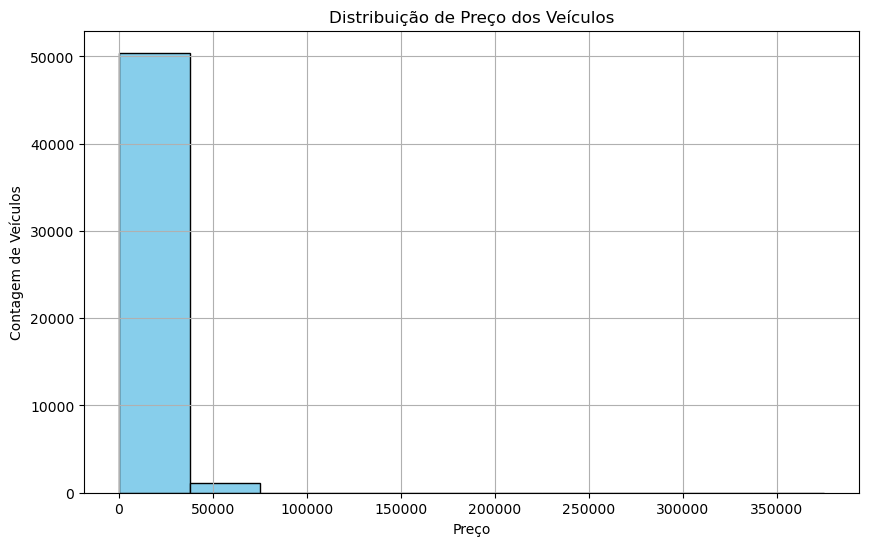

In [57]:
#Histograma 'price'
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Preço')
plt.ylabel('Contagem de Veículos')
plt.title('Distribuição de Preço dos Veículos')
plt.grid(True)
plt.show()

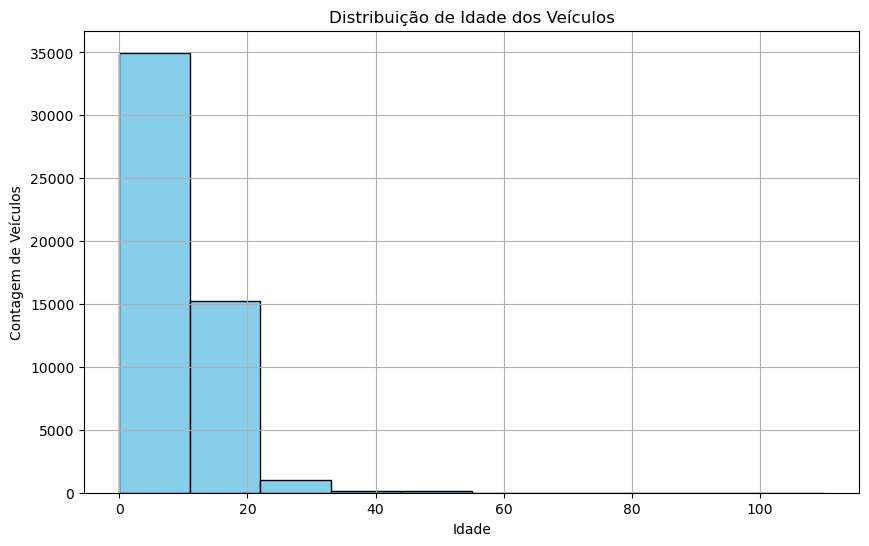

In [58]:
#Histograma 'age'
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Idade')
plt.ylabel('Contagem de Veículos')
plt.title('Distribuição de Idade dos Veículos')
plt.grid(True)
plt.show()

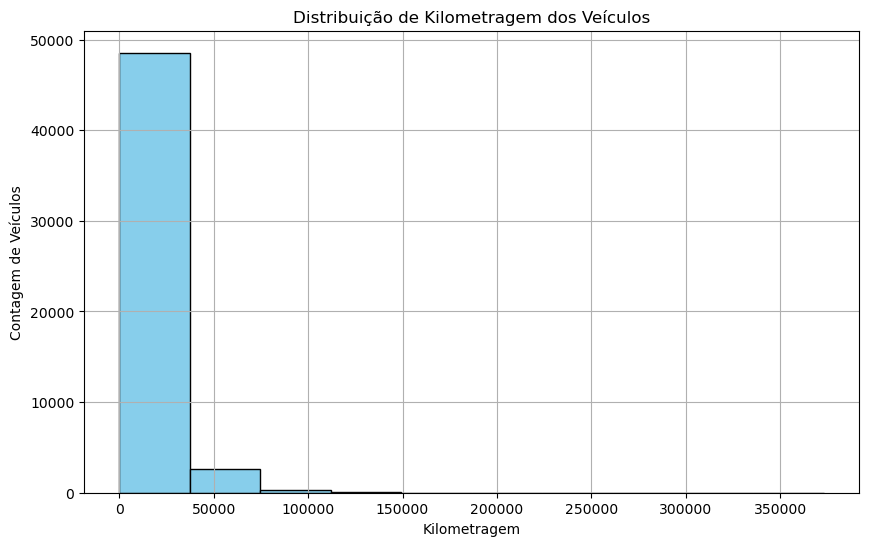

In [59]:
#Histograma 'age_km'
plt.figure(figsize=(10, 6))
plt.hist(df['age_km'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Kilometragem')
plt.ylabel('Contagem de Veículos')
plt.title('Distribuição de Kilometragem dos Veículos')
plt.grid(True)
plt.show()

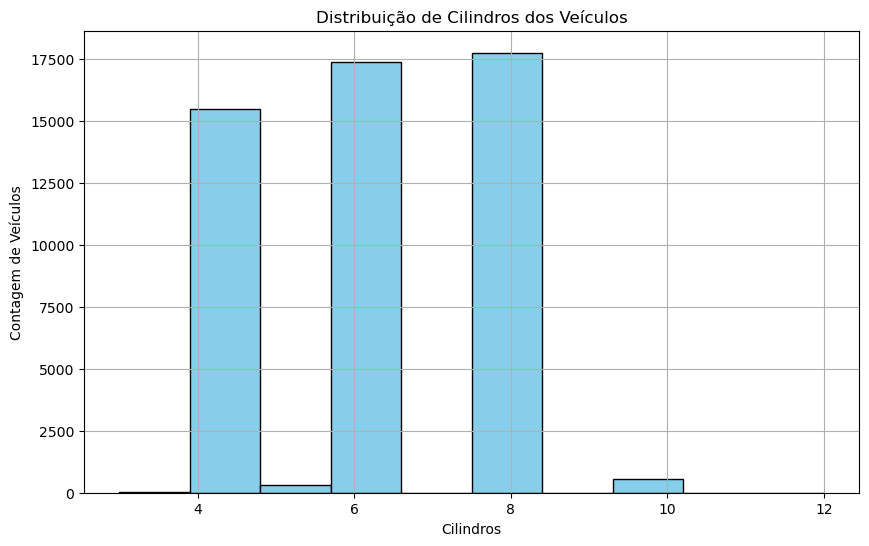

In [60]:
#Histograma 'cylinders'
plt.figure(figsize=(10, 6))
plt.hist(df['cylinders'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Cilindros')
plt.ylabel('Contagem de Veículos')
plt.title('Distribuição de Cilindros dos Veículos')
plt.grid(True)
plt.show()

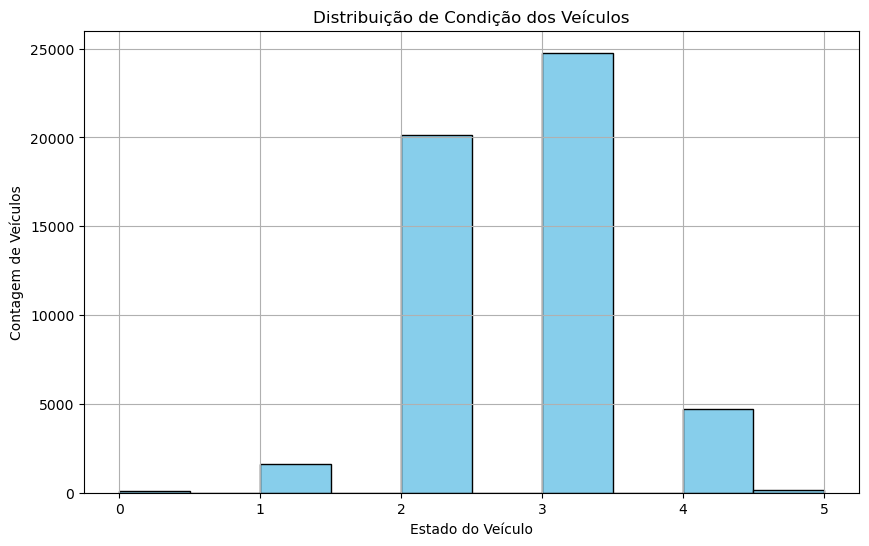

In [61]:
#Histograma 'condition'
plt.figure(figsize=(10, 6))
plt.hist(df['condition'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Estado do Veículo')
plt.ylabel('Contagem de Veículos')
plt.title('Distribuição de Condição dos Veículos')
plt.grid(True)
plt.show()

Nós iremos realizar novamente a EDA, pois notamos valores atipicos em 'price' , 'age' e 'age_km' histogramas apresentados.

### Removendo Outliers

Existem 3 colunas com valores atipicos 'price' , 'age' e 'age_km'. Vamos determinar o limite inferior e superior, e armazenar em novo DataFrame sem 'outliers'.

In [62]:
# Determine o limite inferior para valores atípicos
Q1_price = df['price'].quantile(0.25)
Q1_age = df['age'].quantile(0.25)
Q1_age_km = df['age_km'].quantile(0.25)

In [63]:
# Determine o limite superior para valores atípicos
Q3_price = df['price'].quantile(0.75)
Q3_age = df['age'].quantile(0.75)
Q3_age_km = df['age_km'].quantile(0.75)

In [64]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
IQR_price = Q3_price - Q1_price
IQR_age = Q3_age - Q1_age
IQR_age_km = Q3_age_km - Q1_age_km


limite_superior_price = Q3_price+(1.5*IQR_price)
limite_superior_age = Q3_age+(1.5*IQR_age)
limite_superior_age_km = Q3_age_km+(1.5*IQR_age_km)

limite_inferior_price = Q1_price - (1.5 * IQR_price)
limite_inferior_age = Q1_age - (1.5 * IQR_age)
limite_inferior_age_km = Q1_age_km - (1.5 * IQR_age_km)

In [65]:
df_limp = df[df['price'] > limite_inferior_price] 
df_limp = df_limp[df_limp['price'] < limite_superior_price]
df_limp = df_limp[df_limp['age'] > limite_inferior_age] 
df_limp = df_limp[df_limp['age'] < limite_superior_age]
df_limp = df_limp[df_limp['age_km'] > limite_inferior_age_km] 
df_limp = df_limp[df_limp['age_km'] < limite_superior_age_km]

### Estudando os parâmetros fundamentais sem valores atípicos

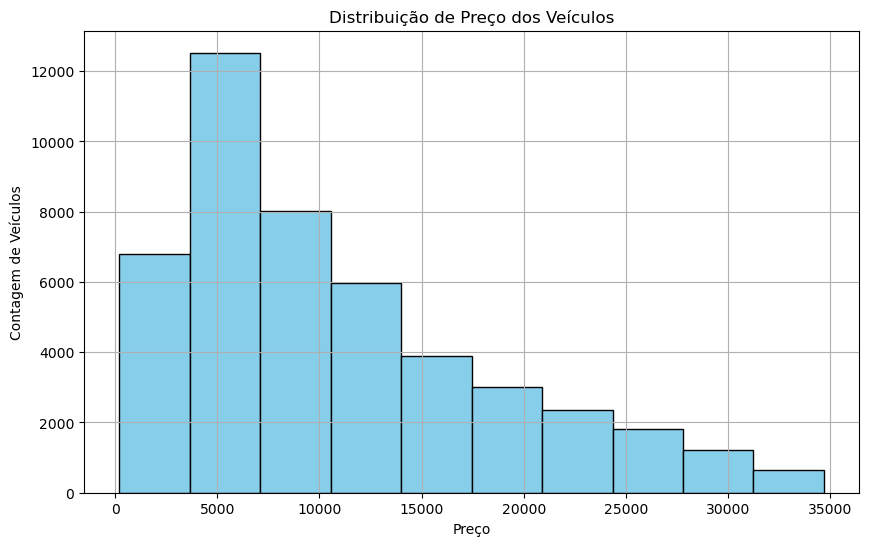

In [66]:
#Histograma 'price'
plt.figure(figsize=(10, 6))
plt.hist(df_limp['price'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Preço')
plt.ylabel('Contagem de Veículos')
plt.title('Distribuição de Preço dos Veículos')
plt.grid(True)
plt.show()

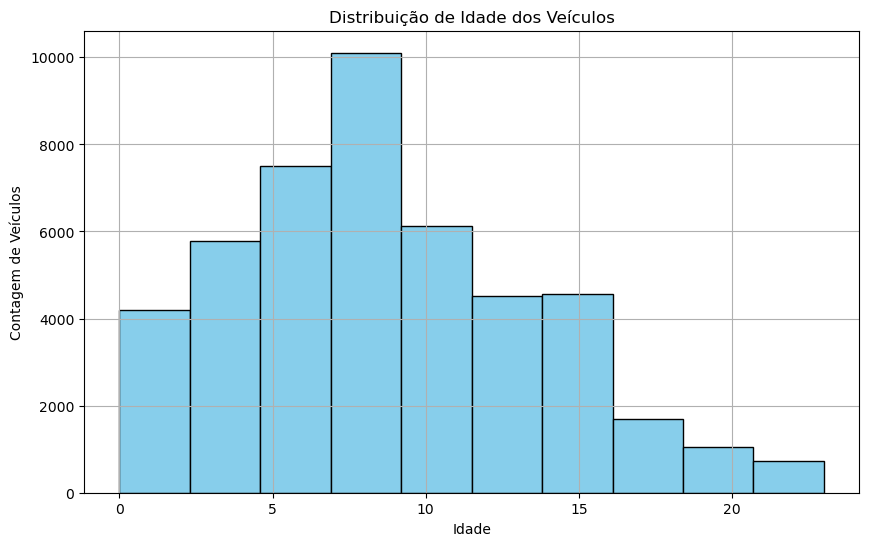

In [67]:
#Histograma 'age'
plt.figure(figsize=(10, 6))
plt.hist(df_limp['age'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Idade')
plt.ylabel('Contagem de Veículos')
plt.title('Distribuição de Idade dos Veículos')
plt.grid(True)
plt.show()

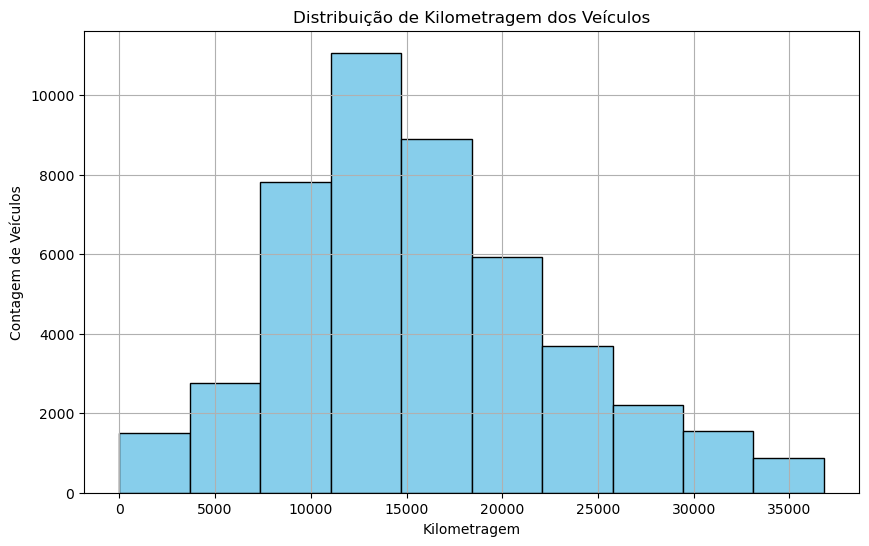

In [68]:
#Histograma 'age_km'
plt.figure(figsize=(10, 6))
plt.hist(df_limp['age_km'], bins=10, edgecolor='black', color='skyblue')
plt.xlabel('Kilometragem')
plt.ylabel('Contagem de Veículos')
plt.title('Distribuição de Kilometragem dos Veículos')
plt.grid(True)
plt.show()

Já demos outra cara para  os nossos dados agora iremos prosseguir com algumas pesguntas.

## Tempo de vida das propagandas

Analisando os histogramas a seguir, percebemos que a vida média das propagandas, tem sua máxima de 39 dias e depois vem em queda livre, sobrando algumas em 46 dias.

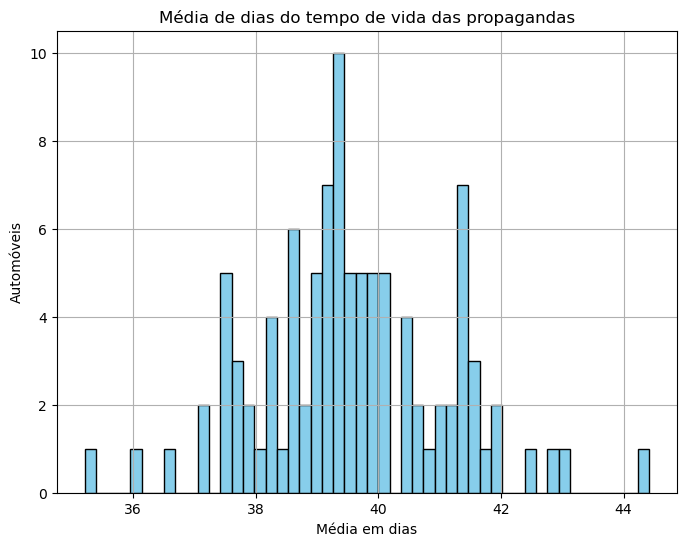

In [69]:
avg_days_listed = df_limp.pivot_table(index='model', values='days_listed', aggfunc='mean')

plt.figure(figsize=(8, 6))
plt.hist(avg_days_listed, bins=50, edgecolor='black', color='skyblue')
plt.title('Média de dias do tempo de vida das propagandas')
plt.xlabel('Média em dias')
plt.ylabel('Automóveis')
plt.grid(True)
plt.show()

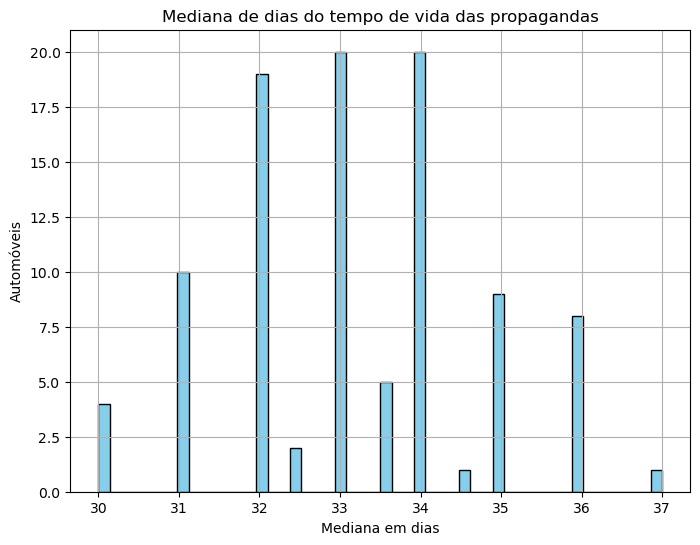

In [70]:
avg_days_listed = df_limp.pivot_table(index='model', values='days_listed', aggfunc='median')

plt.figure(figsize=(8, 6))
plt.hist(avg_days_listed, bins=50, edgecolor='black', color='skyblue')
plt.title('Mediana de dias do tempo de vida das propagandas')
plt.xlabel('Mediana em dias')
plt.ylabel('Automóveis')
plt.grid(True)
plt.show()

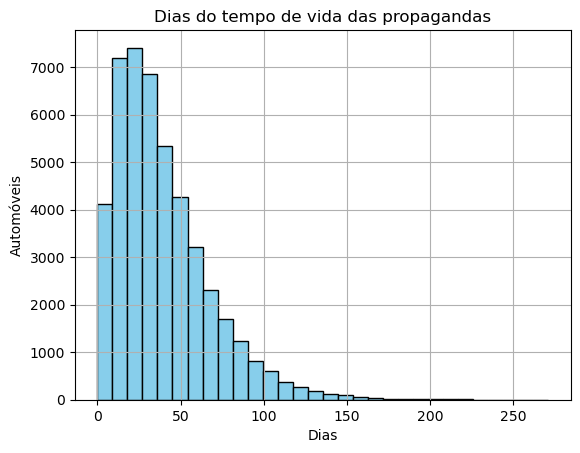

In [71]:
df_limp.hist('days_listed', bins=30, edgecolor='black', color='skyblue')
plt.title('Dias do tempo de vida das propagandas')
plt.xlabel('Dias')
plt.ylabel('Automóveis')
plt.grid(True)
plt.show()

### Média de preços por cada tipo de veículo

Podemos ver a dependência do número de propagandas em relação ao tipo de veículo e média de preço sobre o tipo de veículo. 'bus' e 'truck' estão entre os veículos mais caros e 'sedan' e 'hatchback' os mais baratos. 'sedan' e 'SUV' são os tipos de veículos com os maiores números de propapgadas.

<Figure size 800x600 with 0 Axes>

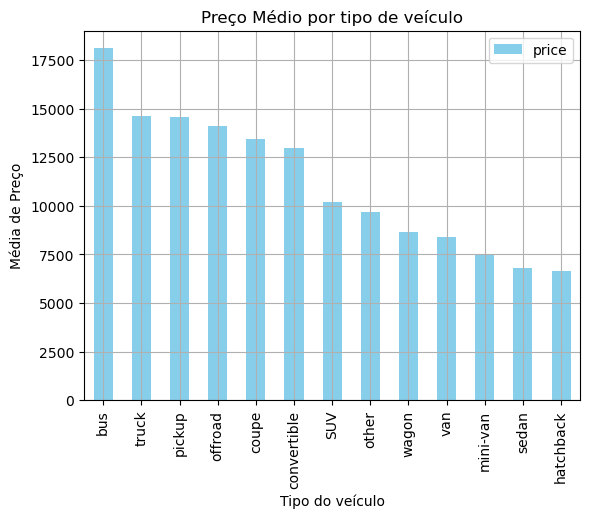

In [72]:
avg_price_type = df_limp.pivot_table(index='type', values='price', aggfunc='mean').sort_values(by='price', ascending=False)

plt.figure(figsize=(8, 6))
avg_price_type.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo do veículo')
plt.ylabel('Média de Preço')
plt.title('Preço Médio por tipo de veículo')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

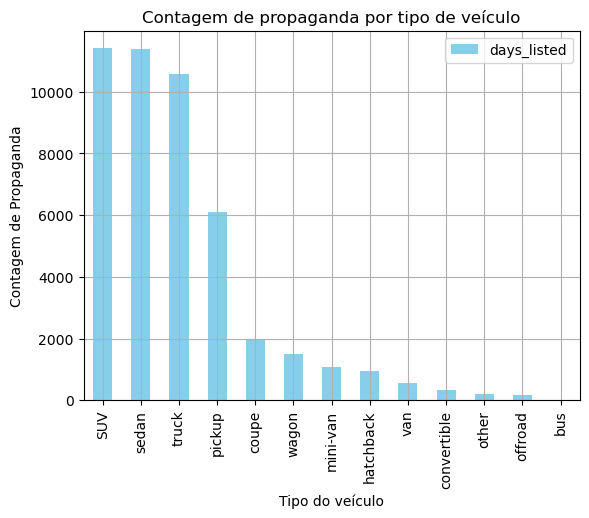

In [73]:
avg_price_days_listed = df_limp.pivot_table(index='type', values='days_listed', aggfunc='count').sort_values(by='days_listed', ascending=False)

plt.figure(figsize=(8, 6))
avg_price_days_listed.plot(kind='bar', color='skyblue')
plt.xlabel('Tipo do veículo')
plt.ylabel('Contagem de Propaganda')
plt.title('Contagem de propaganda por tipo de veículo')
plt.grid(True)
plt.show();

### Fatores de preço

Podemos analisar que idade, quilometragem, condição, tipo de transmissão influenciam diretamente no preço do veículo, porém a cor é apenas uma questão de gosto, pois não varia muito a questão do preço.

In [74]:
df_limp_suv = df_limp.query("type == 'SUV'")
df_limp_sedan = df_limp.query("type == 'sedan'")

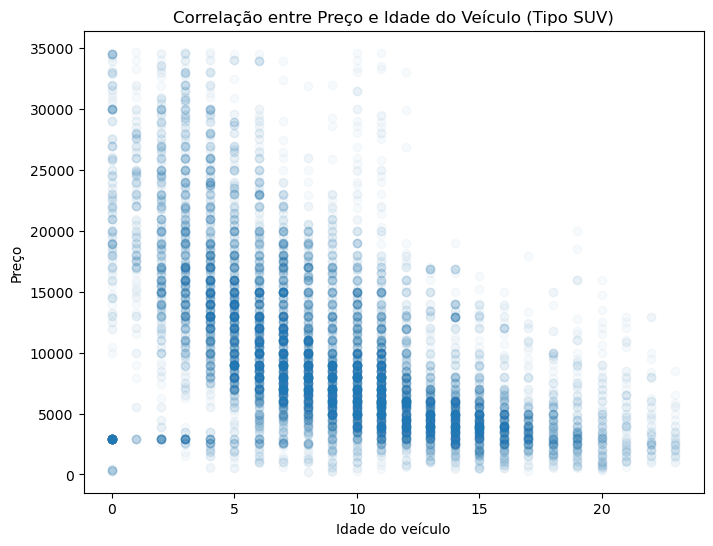

In [75]:

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_limp_suv['age'], df_limp_suv['price'], alpha=0.03)
plt.title('Correlação entre Preço e Idade do Veículo (Tipo SUV)')
plt.xlabel('Idade do veículo')
plt.ylabel('Preço')
plt.show()

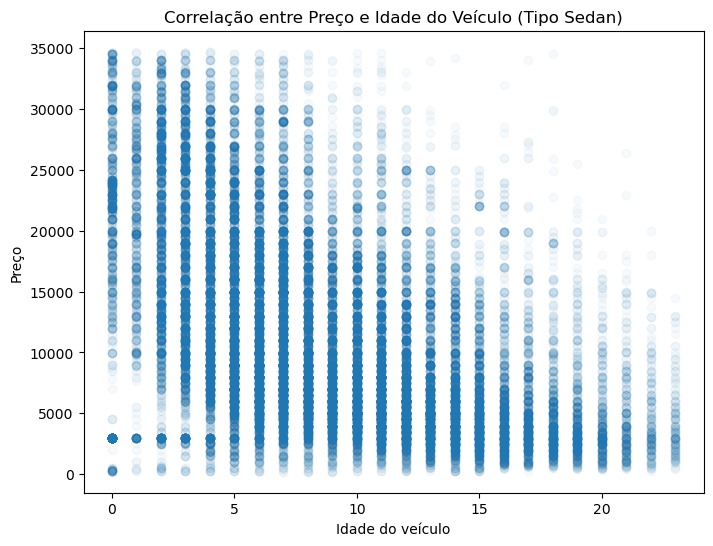

In [76]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_limp['age'], df_limp['price'], alpha=0.03)
plt.title('Correlação entre Preço e Idade do Veículo (Tipo Sedan)')
plt.xlabel('Idade do veículo')
plt.ylabel('Preço')
plt.show()

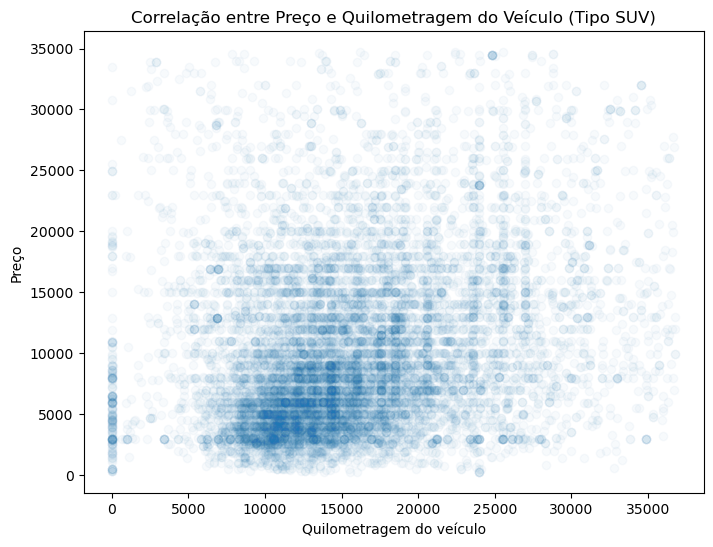

In [77]:
# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_limp_suv['age_km'], df_limp_suv['price'], alpha=0.03)
plt.title('Correlação entre Preço e Quilometragem do Veículo (Tipo SUV)')
plt.xlabel('Quilometragem do veículo')
plt.ylabel('Preço')
plt.show()

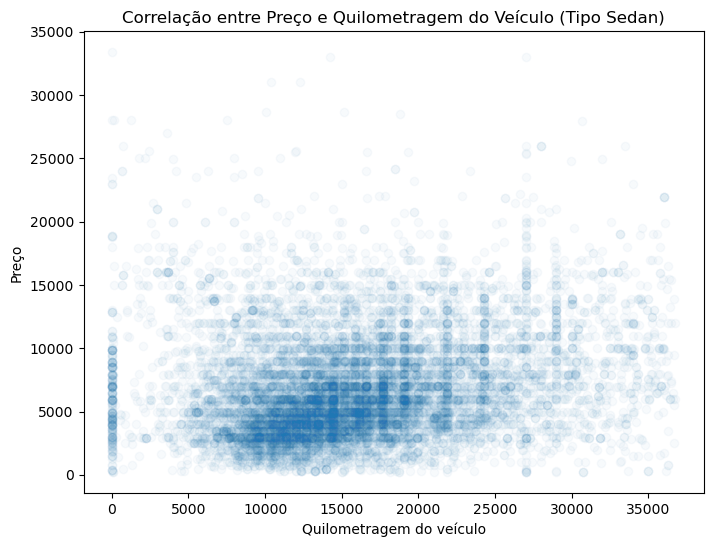

In [78]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_limp_sedan['age_km'], df_limp_sedan['price'], alpha=0.03)
plt.title('Correlação entre Preço e Quilometragem do Veículo (Tipo Sedan)')
plt.xlabel('Quilometragem do veículo')
plt.ylabel('Preço')
plt.show()

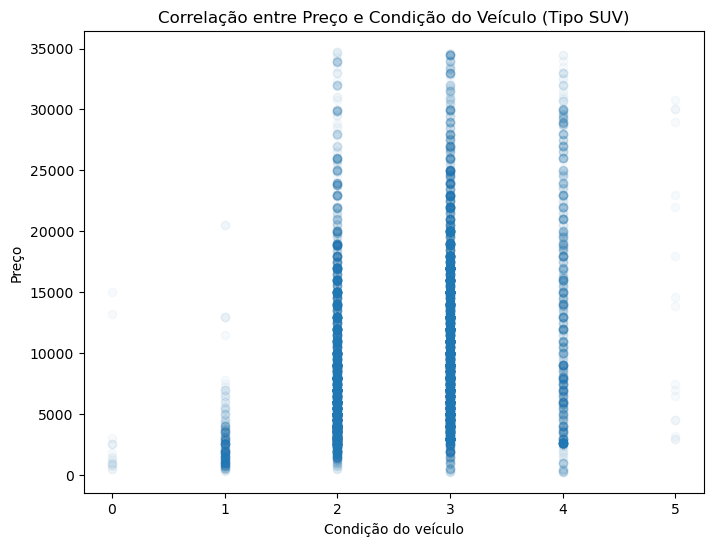

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(df_limp_suv['condition'], df_limp_suv['price'], alpha=0.03)
plt.title('Correlação entre Preço e Condição do Veículo (Tipo SUV)')
plt.xlabel('Condição do veículo')
plt.ylabel('Preço')
plt.show()

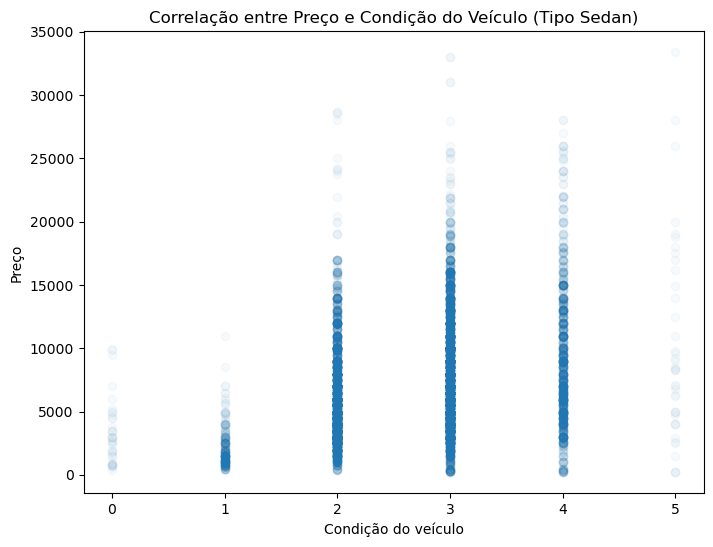

In [80]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_limp_sedan['condition'], df_limp_sedan['price'], alpha=0.03)
plt.title('Correlação entre Preço e Condição do Veículo (Tipo Sedan)')
plt.xlabel('Condição do veículo')
plt.ylabel('Preço')
plt.show()

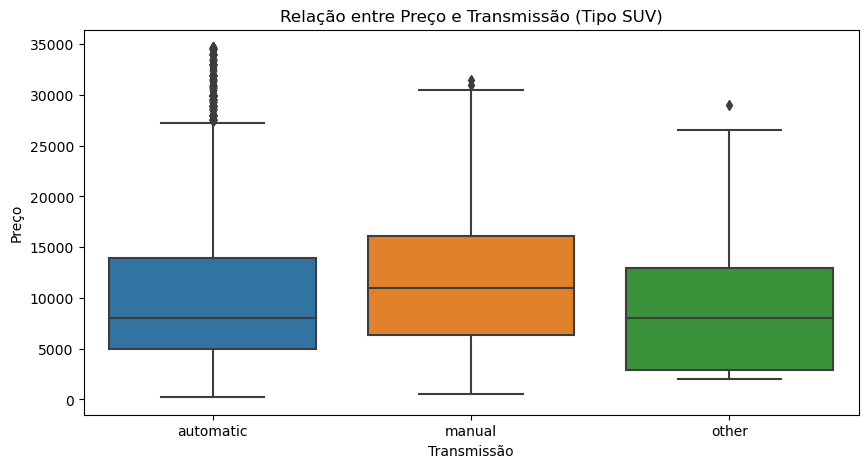

In [81]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='transmission', y='price', data=df_limp_suv, ax=ax)
plt.title('Relação entre Preço e Transmissão (Tipo SUV)')
plt.xlabel('Transmissão')
plt.ylabel('Preço')
plt.show()

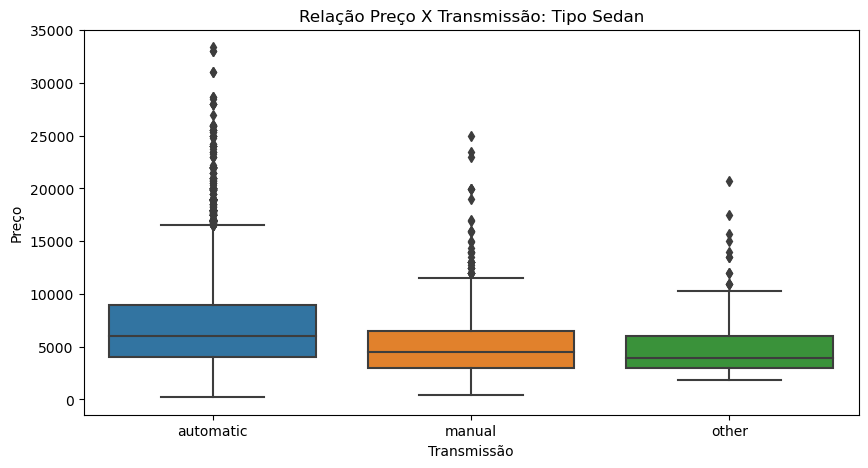

In [82]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='transmission', y='price', data=df_limp_sedan)
plt.title('Relação Preço X Transmissão: Tipo Sedan');
plt.xlabel('Transmissão');
plt.ylabel('Preço');

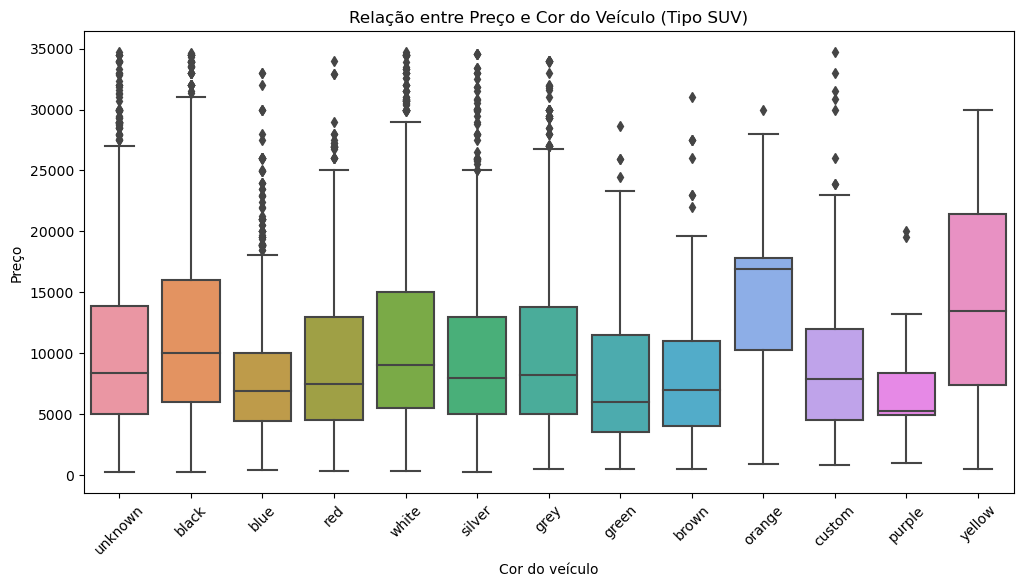

In [83]:
# Create a boxplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='paint_color', y='price', data=df_limp_suv, ax=ax)
plt.title('Relação entre Preço e Cor do Veículo (Tipo SUV)')
plt.xlabel('Cor do veículo')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

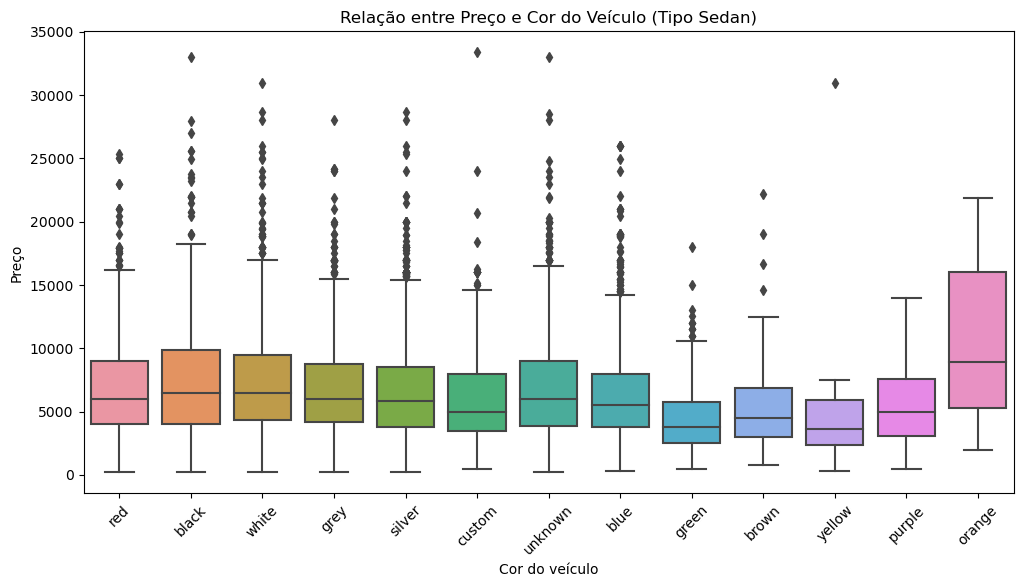

In [84]:
# Create a boxplot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='paint_color', y='price', data=df_limp_sedan, ax=ax)
plt.title('Relação entre Preço e Cor do Veículo (Tipo Sedan)')
plt.xlabel('Cor do veículo')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

## Conclusão geral <a id='end'></a>

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos, e "matplotlib" e "seaborn" para a construção de graficos para melhor visualização e entendimento do problema.

Com base nos estudos realizamos o pré-processamento de dados,em cada coluna realizamos a padronização de estilos, modificamos valores incongruentes, substituimos valores ausentes com base em estudos sobre outras colunas com valores devidamente preenchidos, removemos as duplicatas de valores existente na base de dados,e realizamos o estudo os dados coletados nos últimos anos para determinar quais fatores influenciaram o preço de um veículo.

Com base na Análise exploratória de dados,concluimos que diversos fatores influênciam no preço, como: o ano, já que carros mais novos custam mais. A condição do veículo indicam que quanto mais conservado ou novo, o preço tende a ser maior. A kilometragem, carros que tem menos kilometragem tendem a ser mais caros. Os tipos mais comum que são sedan e SUV. Em média Carros SUV sua transmissão manueal normalmente é mais cara, porem o sedan, a transmissão automatica é mais cara, já a cor depende uma questão de gosto, pois tem suas médias de preço bem parecidas.